# How to Use `Tensorflow 2`

### Loading Libraries

In [3]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D  

# Warnings
import warnings

# Path
from pathlib import Path
from copy import deepcopy

# Scikit-Learn
import sklearn
from sklearn.datasets import make_circles 

# Tensorflow
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from tensorflow.keras.callbacks import TensorBoard

In [4]:
sns.set_style('white')

np.random.seed(seed=42)

warnings.filterwarnings('ignore')

In [5]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


In [9]:
results_path = Path('results')

if not results_path.exists():
    results_path.mkdir()

### Input Data

#### Generating Random Data

In [12]:
N = 50000

factor = 0.1

noise = 0.1

In [14]:
X, y = make_circles(
    n_samples=N,
    shuffle=True,
    factor=factor,
    noise=noise)

In [16]:
Y = np.zeros((N, 2))

for c in [0, 1]:
    Y[y == c, c] = 1

In [18]:
f'Shape of: X: {X.shape} | Y: {Y.shape} | y: {y.shape}'

'Shape of: X: (50000, 2) | Y: (50000, 2) | y: (50000,)'

#### Visualizing Data

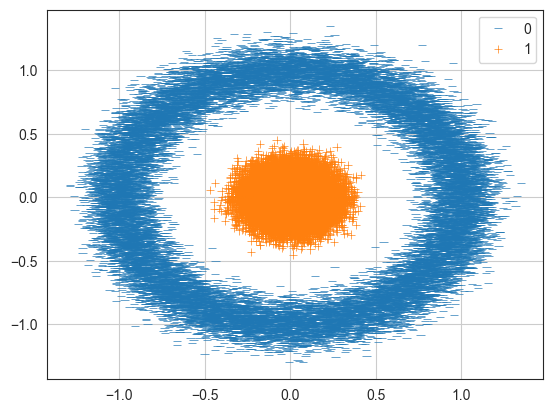

In [21]:
sns.scatterplot(x=X[:, 0], 
                y=X[:, 1], 
                hue=y,
               style=y,
               markers=['_', '+']);

plt.grid()
plt.show()

### Building Keras Model

#### Defining Architecture

In [24]:
model = Sequential([
    Dense(units=3, input_shape=(2,), name='hidden'),
    Activation('sigmoid', name='logistic'),
    Dense(2, name='output'),
    Activation('softmax', name='softmax'),
])

2025-04-30 10:03:22.160773: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-04-30 10:03:22.160826: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-04-30 10:03:22.160840: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-04-30 10:03:22.160915: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-30 10:03:22.160940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ logistic (Activation)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Activation)            │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

#### Compiling Model

In [29]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Tensorboard Callback

In [32]:
tb_callback = TensorBoard(log_dir=results_path / 'tensorboard', 
                          histogram_freq=1, 
                          write_graph=True, 
                          write_images=True)

#### Training Model

In [35]:
training=model.fit(X, 
          Y, 
          epochs=50,
          validation_split=.2,
          batch_size=128, 
          verbose=1, 
          callbacks=[tb_callback])

Epoch 1/50


2025-04-30 10:03:31.703411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4999 - loss: 0.7599 - val_accuracy: 0.5075 - val_loss: 0.6944
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4324 - loss: 0.6930 - val_accuracy: 0.5209 - val_loss: 0.6896
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5725 - loss: 0.6884 - val_accuracy: 0.7252 - val_loss: 0.6850
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7057 - loss: 0.6826 - val_accuracy: 0.7924 - val_loss: 0.6762
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8065 - loss: 0.6722 - val_accuracy: 0.8215 - val_loss: 0.6609
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8337 - loss: 0.6557 - val_accuracy: 0.8449 - val_loss: 0.6399
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8507 - loss: 0.6332 - val_accuracy: 0.8552 - val_loss: 0.6128
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8633 - loss: 0.6034 - val_accuracy: 0.8598 - val_

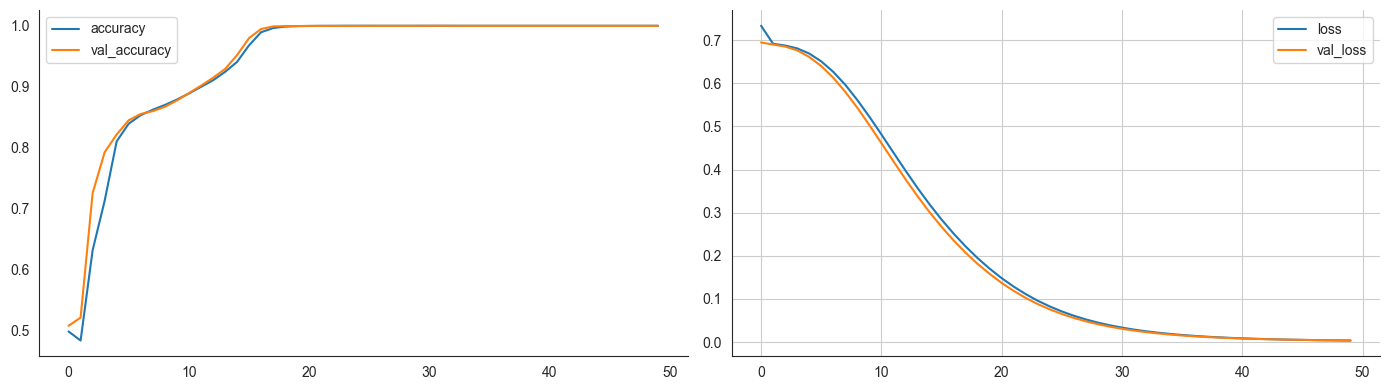

In [41]:
fig, axes = plt.subplots(ncols=2, figsize=(14,4))

pd.DataFrame(training.history)[['accuracy', 'val_accuracy']].plot(ax=axes[0])
pd.DataFrame(training.history)[['loss', 'val_loss']].plot(ax=axes[1])
sns.despine()
fig.tight_layout();

plt.grid()
plt.show()

#### Getting Weights

In [44]:
hidden = model.get_layer('hidden').get_weights()

In [46]:
[t.shape for t in hidden]

[(2, 3), (3,)]

#### Plotting Decision Boundary

In [51]:
n_vals = 200

x1 = np.linspace(-1.5, 1.5, num=n_vals)
x2 = np.linspace(-1.5, 1.5, num=n_vals)

xx, yy = np.meshgrid(x1, x2)  

In [53]:
X_ = np.array([xx.ravel(), yy.ravel()]).T

In [55]:
y_hat = np.argmax(model.predict(X_), axis=1)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step


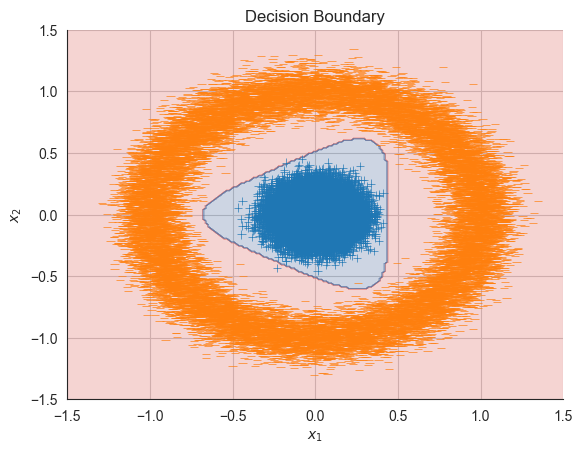

In [59]:
cmap = ListedColormap([sns.xkcd_rgb["pale red"],
                       sns.xkcd_rgb["denim blue"]])


plt.contourf(xx, yy, y_hat.reshape(n_vals, -1), cmap=cmap, alpha=.25)

data = pd.DataFrame(X, columns=['$x_1$', '$x_2$']).assign(Class=pd.Series(y).map({0:'negative', 1:'positive'}))
sns.scatterplot(x='$x_1$', y='$x_2$', hue='Class', data=data, style=y, markers=['_', '+'], legend=False)
sns.despine()
plt.title('Decision Boundary');
plt.grid()

plt.show()

In [61]:
%load_ext tensorboard

In [65]:
# %tensorboard --logdir results/tensorboard/